In [187]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

4032 3024 3


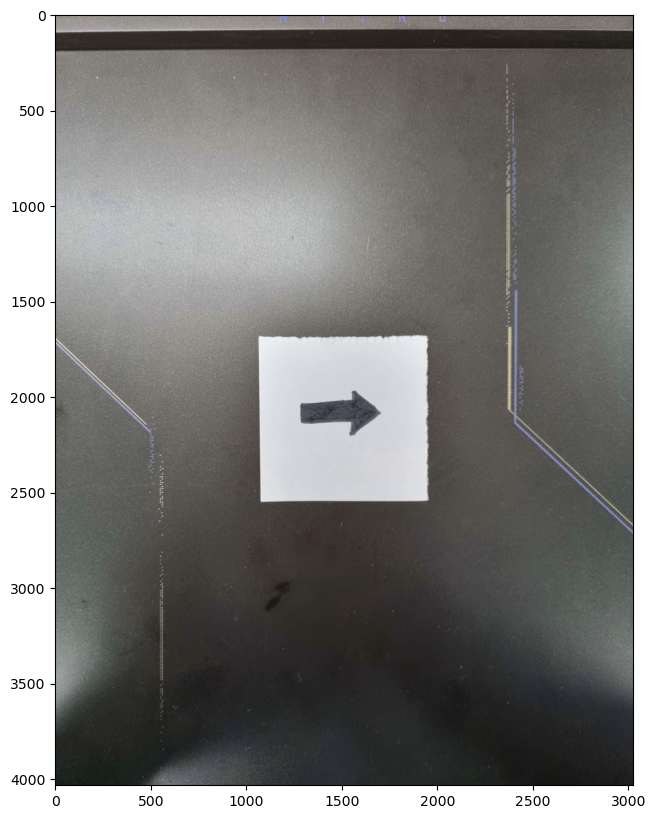

In [2]:
img_ori = cv2.imread('./images/arrow2.jpg')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori,cmap='gray')
print(height, width, channel)

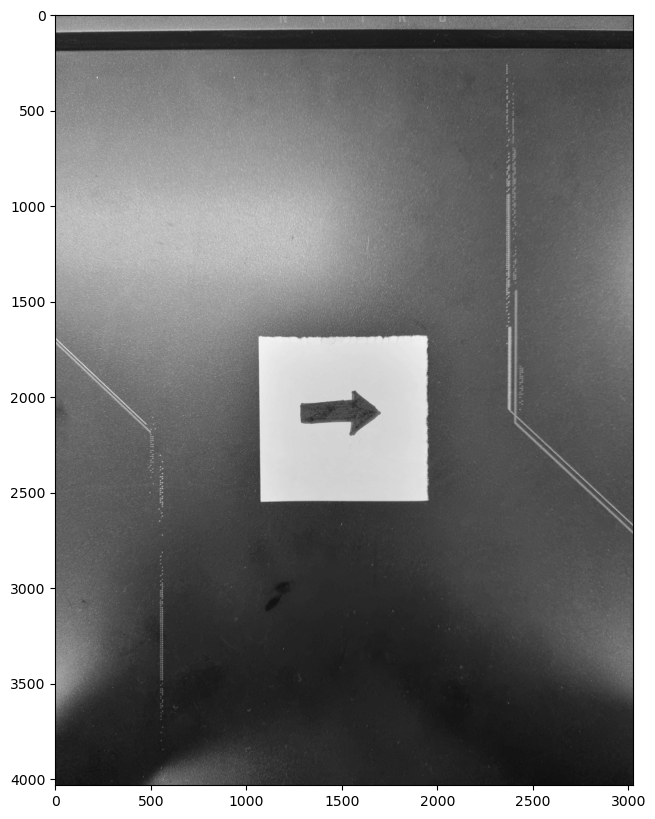

In [13]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,10))
plt.imshow(gray, cmap='gray')

In [31]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=5
)

In [32]:
img_thresh = cv2.adaptiveThreshold(
    gray,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=5
)

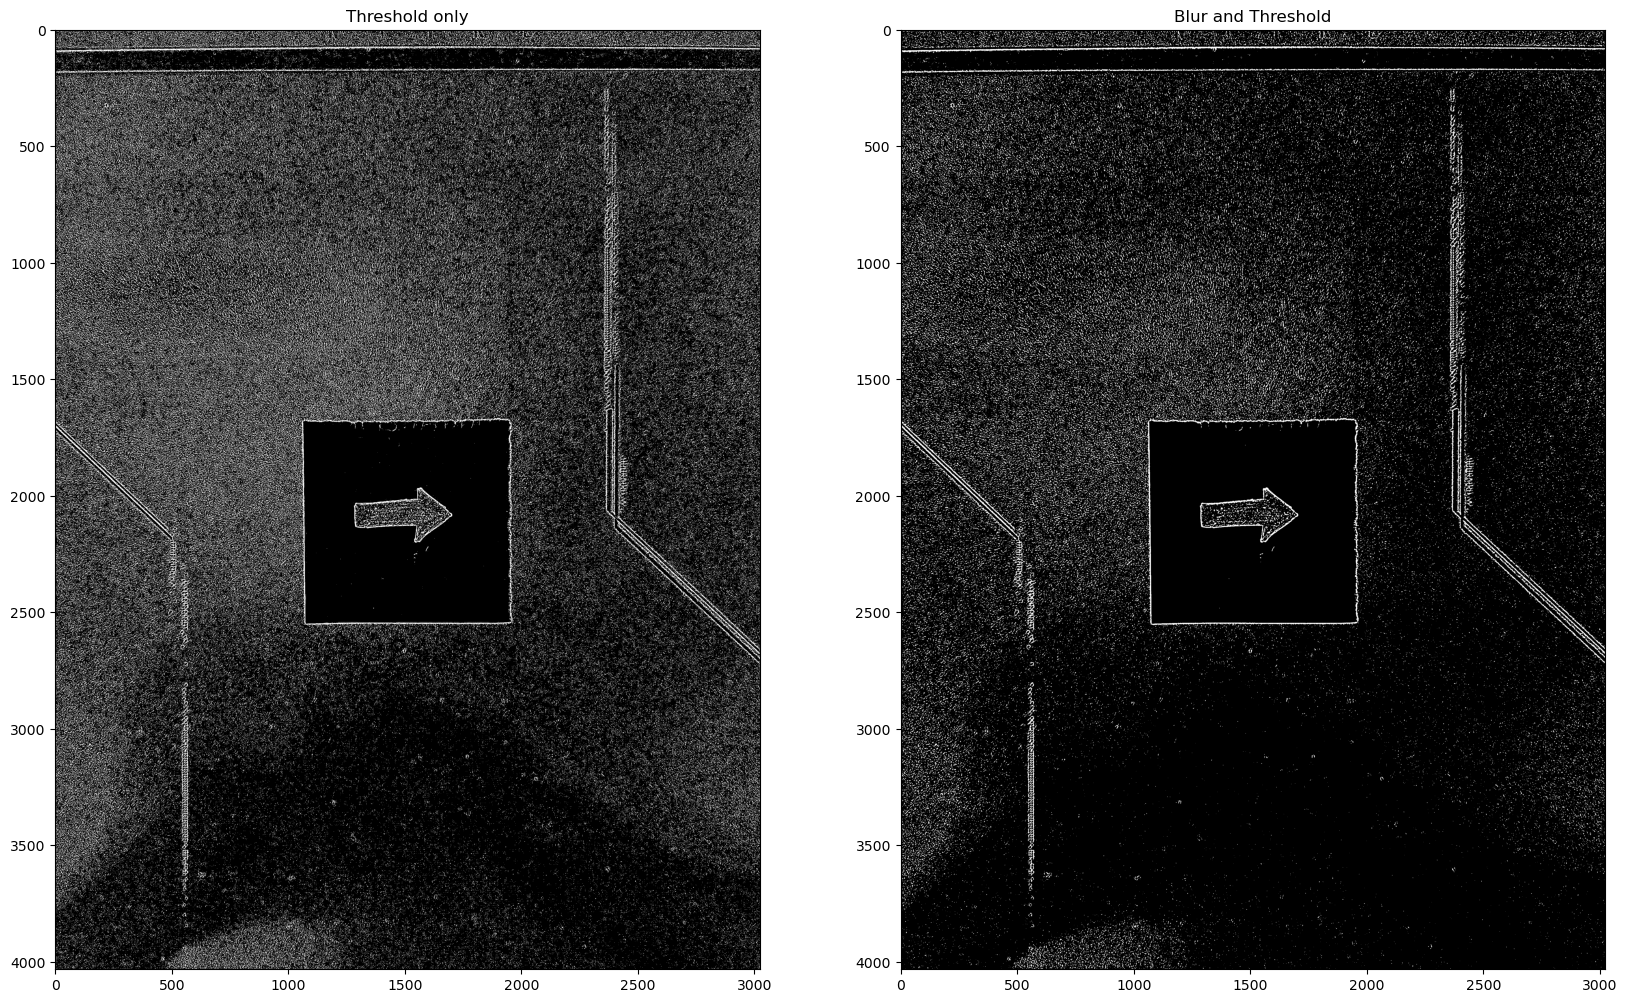

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Threshold only')
plt.imshow(img_thresh, cmap='gray')
plt.subplot(1,2,2)
plt.title('Blur and Threshold')
plt.imshow(img_blur_thresh, cmap='gray')

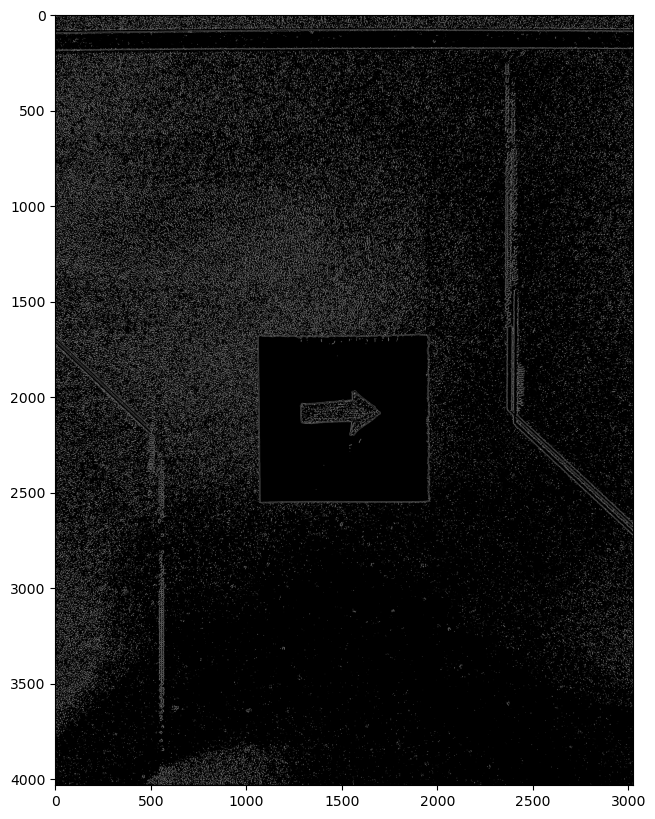

In [46]:
contours, _ = cv2.findContours(
    img_blur_thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255,255,255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)

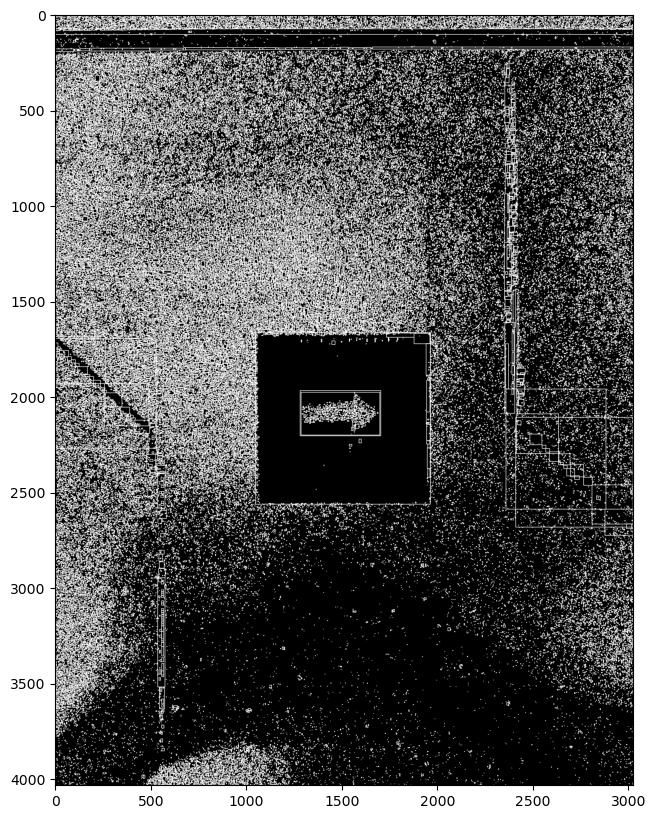

In [47]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=2)
    
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })
    
plt.figure(figsize=(12,10))
plt.imshow(temp_result, cmap='gray')

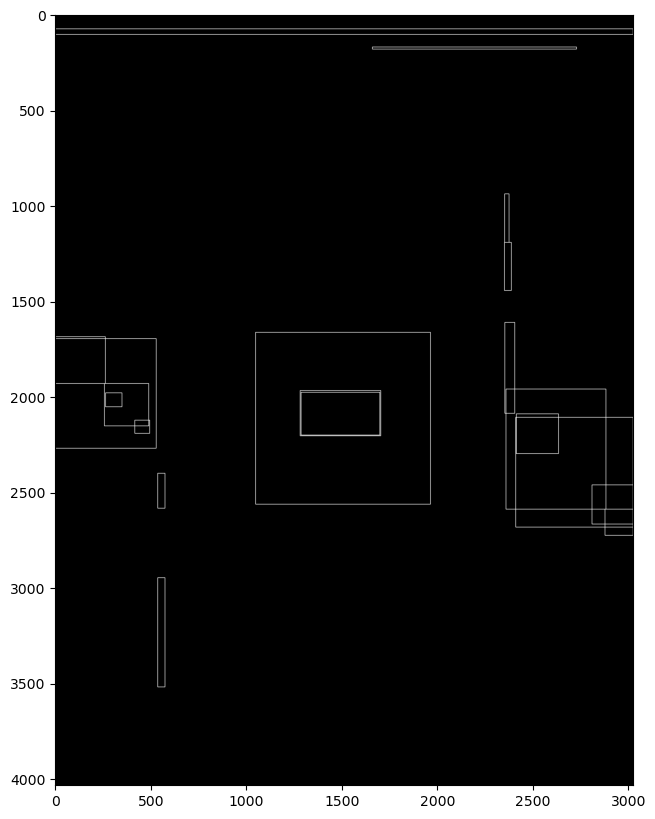

In [48]:
MIN_AREA = 5000
MIN_WIDTH, MIN_HEIGHT=2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

temp_result = np.zeros((height, width, channel), dtype = np.uint8)

for d in possible_contours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
    
plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

### 원본 image에 그리기

In [55]:
img = cv2.imread('./images/arrow2.jpg')

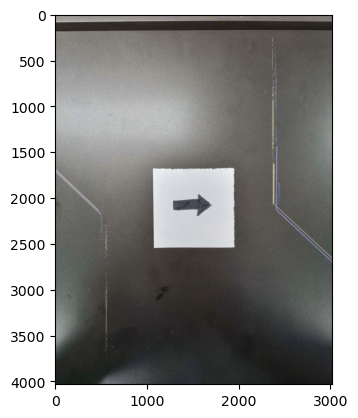

In [56]:
plt.imshow(img)

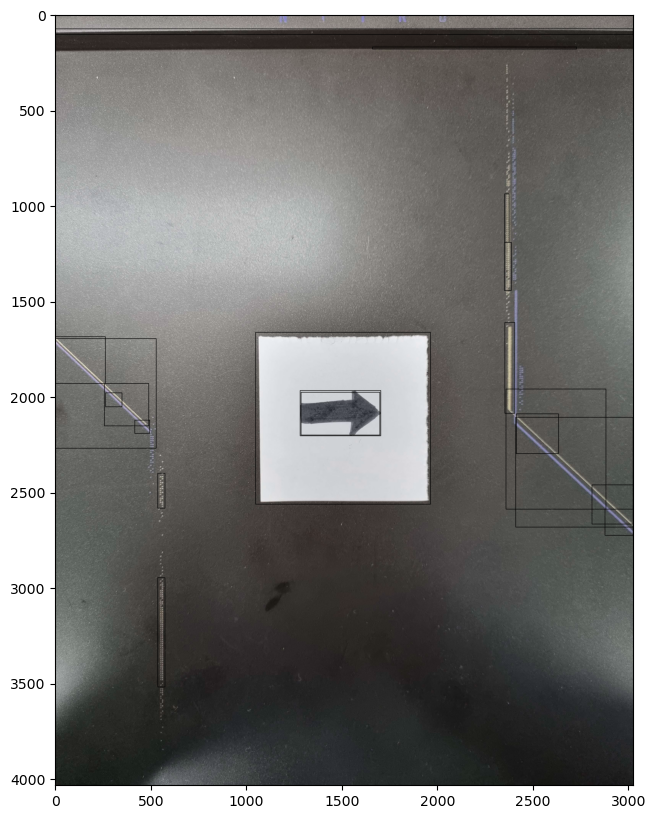

In [68]:
MIN_AREA = 5000

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    
    if area > MIN_AREA:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

for d in possible_contours:
    cv2.rectangle(img, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(0, 0, 0), thickness=2)
    
plt.figure(figsize=(12, 10))
plt.imshow(img, cmap='gray')

In [125]:
possible_contours[0]

{'contour': array([[[ 564, 2946]],
 
        [[ 563, 2947]],
 
        [[ 560, 2947]],
 
        ...,
 
        [[ 568, 2950]],
 
        [[ 566, 2948]],
 
        [[ 566, 2946]]], dtype=int32),
 'x': 537,
 'y': 2946,
 'w': 38,
 'h': 572,
 'cx': 556.0,
 'cy': 3232.0,
 'idx': 0}

In [153]:
img_origin = cv2.imread('./images/arrow2.jpg')

In [154]:
img_list = []

In [155]:
for i in range(len(possible_contours)):
    img_list.append(img_origin[possible_contours[i]['y'] : possible_contours[i]['y'] + possible_contours[i]['h'], \
        possible_contours[i]['x'] : possible_contours[i]['x'] + possible_contours[i]['w']])

In [156]:
img_list[2].shape

(205, 215, 3)

In [267]:
arrow_test2 = img_list[9]

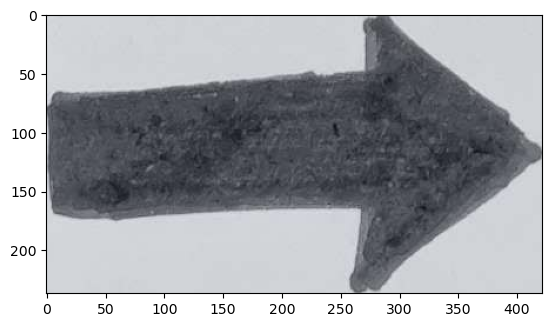

In [268]:
plt.imshow(img_list[9])

In [195]:
arrow_test = img_list[14]

In [196]:
output_img_36 = cv2.resize(arrow_test, (36, 36), interpolation = cv2.INTER_AREA)

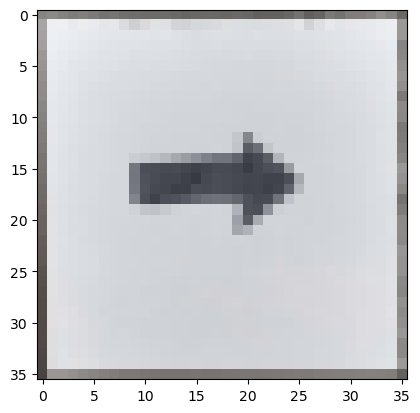

In [197]:
plt.imshow(output_img_36)

In [269]:
cv2.imwrite('./images/arrow_right.jpg', img_list[14])
cv2.imwrite('./images/arrow_right2.jpg', img_list[9])

True

In [218]:
def make_image(crop_img2):
    (cX, cY) = (18, 18)
    
    # -15 ~ 15 범위 무작위 회전
    M = cv2.getRotationMatrix2D((cX, cY), random.randint(-15, 15), 1.0)
    rotated_45 = cv2.warpAffine(crop_img2, M, (36, 36))
    
    # -2 ~ 2 범위 무작위 이동
    M = np.float32([[1, 0, random.randint(-2, 2)], 
                    [0, 1, random.randint(-2, 2)]])
    shifted = cv2.warpAffine(rotated_45, M, (rotated_45.shape[1], rotated_45.shape[0]))

    # 그레이 스케일 및 이진화
    gray_img = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    ret, th1 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
    return th1
    

In [219]:
gimg_list = []


for i in range(40000):
    test_img = cv2.imread('./images/arrow_right.jpg')
    
    out = test_img.copy()
    out = 255 - out
    
    # 36 x 36
    output_img_36 = cv2.resize(out, (36, 36), interpolation = cv2.INTER_AREA)
    
    # 1.3배 ~ 1.7 배 무작위 확대
    mul = random.uniform(1.3, 1.7)
    dst2 = cv2.resize(output_img_36, None,  None, mul, mul, cv2.INTER_CUBIC)
    height, width = dst2.shape[:2]
    half_h, half_w = int(height / 2), int(width / 2)
    crop_img2 = dst2[half_h-18:half_h+18, half_w-18:half_w+18]
    
    if i < 10000:
        th1 = make_image(crop_img2)
        gimg_list.append(th1)
    elif i < 20000:
        M = cv2.getRotationMatrix2D((18, 18), 90, 1.0)
        rotated_90 = cv2.warpAffine(crop_img2, M, (36, 36))
        th1 = make_image(rotated_90)
        gimg_list.append(th1)
    elif i < 30000:
        M = cv2.getRotationMatrix2D((18, 18), 180, 1.0)
        rotated_180 = cv2.warpAffine(crop_img2, M, (36, 36))
        th1 = make_image(rotated_180)
        gimg_list.append(th1)
    elif i < 40000:
        M = cv2.getRotationMatrix2D((18, 18), 270, 1.0)
        rotated_270 = cv2.warpAffine(crop_img2, M, (36, 36))
        th1 = make_image(rotated_270)
        gimg_list.append(th1)

In [270]:
def make_image2(crop_img2):
    (cX, cY) = (18, 18)
    
    # -15 ~ 15 범위 무작위 회전
    M = cv2.getRotationMatrix2D((cX, cY), random.randint(-5, 5), 1.0)
    rotated_45 = cv2.warpAffine(crop_img2, M, (36, 36))

    # 그레이 스케일 및 이진화
    gray_img = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    ret, th1 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
    return th1

In [271]:
for i in range(40000):
    test_img = cv2.imread('./images/arrow_right2.jpg')
    
    out = test_img.copy()
    out = 255 - out
    
    # 36 x 36
    output_img_36 = cv2.resize(out, (36, 36), interpolation = cv2.INTER_AREA)
    
    if i < 10000:
        th1 = make_image(output_img_36)
        gimg_list.append(th1)
    elif i < 20000:
        M = cv2.getRotationMatrix2D((18, 18), 90, 1.0)
        rotated_90 = cv2.warpAffine(output_img_36, M, (36, 36))
        th1 = make_image(rotated_90)
        gimg_list.append(th1)
    elif i < 30000:
        M = cv2.getRotationMatrix2D((18, 18), 180, 1.0)
        rotated_180 = cv2.warpAffine(output_img_36, M, (36, 36))
        th1 = make_image(rotated_180)
        gimg_list.append(th1)
    elif i < 40000:
        M = cv2.getRotationMatrix2D((18, 18), 270, 1.0)
        rotated_270 = cv2.warpAffine(output_img_36, M, (36, 36))
        th1 = make_image(rotated_270)
        gimg_list.append(th1)

In [288]:
gimg_list2 = gimg_list[:40000] + gimg_list[80000:]

In [290]:
len(gimg_list2)

80000

↑


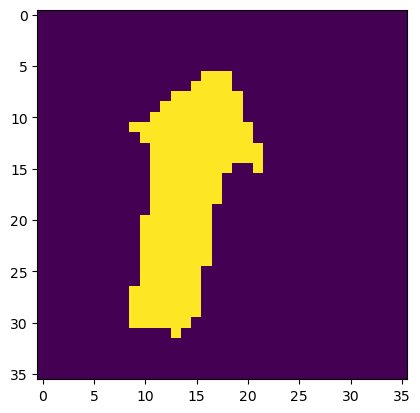

In [324]:
plt.imshow(gimg_list2[19999])
print(y_list[19999])

In [325]:
gimg_list3 = gimg_list2[40000:]

In [326]:
arrow_img_array = np.array(gimg_list3)

In [327]:
np.save('./arrow_img_array3', arrow_img_array)

In [328]:
arrow_array = np.load('./arrow_img_array3.npy')

In [329]:
arrow_array.shape

(40000, 36, 36)

In [330]:
y_list = []


for i in range(40000):
    if i < 10000:
        y_list.append('→')
        
    elif i < 20000:
        y_list.append('↑')
        
    elif i < 30000:
        y_list.append('←')
        
    elif i < 40000:
        y_list.append('↓')

In [296]:
for i in range(40000):
    if i < 10000:
        y_list.append('→')
        
    elif i < 20000:
        y_list.append('↑')
        
    elif i < 30000:
        y_list.append('←')
        
    elif i < 40000:
        y_list.append('↓')

In [298]:
len(y_list)

80000

In [331]:
label_array = np.array(y_list)

In [332]:
label_array.shape

(40000,)

In [333]:
X_train = arrow_array
y_train = label_array

### Shape

In [334]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [335]:
input_shape = X_train.shape[1] * X_train.shape[2]
number_of_classes = len(set(y_train))

In [336]:
X_train = X_train / 255.0
# X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
# X_test = X_test.reshape(-1, input_shape)

In [337]:
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (40000, 1296)

X_train_shape: (40000, 1296)


In [338]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(y_train)

LabelEncoder()

In [339]:
y_train

array(['→', '→', '→', ..., '↓', '↓', '↓'], dtype='<U1')

In [340]:
labeled_y_train = encoder.transform(y_train)

In [341]:
labeled_y_train.shape

(40000,)

In [342]:
labeled_y_train

array([2, 2, 2, ..., 3, 3, 3])

In [343]:
y_train = to_categorical(labeled_y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원

### 모델 학습

In [344]:
model = Sequential()

In [345]:
X_train.shape[1:], y_train.shape[1]

((1296,), 4)

In [346]:
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

In [347]:
model.add(Dense(y_train.shape[1], activation="sigmoid"))

In [348]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./model/best_model_01.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               166016    
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 166532 (650.52 KB)
Trainable params: 166532 (650.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [349]:
history = model.fit(X_train, y_train, batch_size=32, callbacks=[mc], epochs=10, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - ETA: 0s - loss: 0.0052 - acc: 0.9979
Epoch 1: val_acc improved from -inf to 1.00000, saving model to ./model\best_model_01.h5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0052 - acc: 0.9979 - val_loss: 1.6223e-04 - val_acc: 1.0000
Epoch 2/10
  39/1000 [>.............................] - ETA: 1s - loss: 4.3307e-05 - acc: 1.0000

C:\Users\jjun\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 997/1000 [============================>.] - ETA: 0s - loss: 2.2314e-05 - acc: 1.0000
Epoch 2: val_acc did not improve from 1.00000
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2295e-05 - acc: 1.0000 - val_loss: 5.7659e-05 - val_acc: 1.0000
Epoch 3/10
 995/1000 [============================>.] - ETA: 0s - loss: 7.4184e-06 - acc: 1.0000
Epoch 3: val_acc did not improve from 1.00000
1000/1000 [==============================] - 2s 2ms/step - loss: 7.3965e-06 - acc: 1.0000 - val_loss: 1.9905e-05 - val_acc: 1.0000
Epoch 4/10
 987/1000 [============================>.] - ETA: 0s - loss: 3.2367e-06 - acc: 1.0000
Epoch 4: val_acc did not improve from 1.00000
1000/1000 [==============================] - 2s 2ms/step - loss: 3.2298e-06 - acc: 1.0000 - val_loss: 8.9872e-06 - val_acc: 1.0000
Epoch 5/10
 990/1000 [============================>.] - ETA: 0s - loss: 1.5914e-06 - acc: 1.0000
Epoch 5: val_acc did not improve from 1.00000
1000/1000 [==============================] - 1

In [185]:
test_img = cv2.imread('./images/arrow_right.jpg')
out = test_img.copy()
out = 255 - out

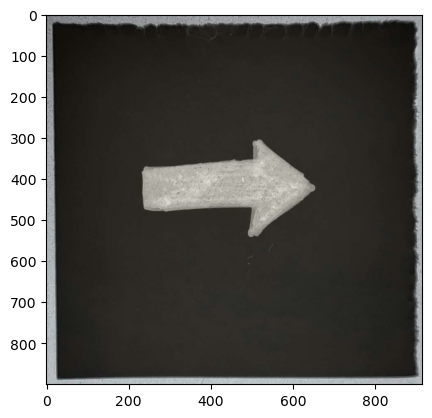

In [186]:
plt.imshow(out)

In [172]:
arrow36 = cv2.resize(img_list[9], (36, 36), interpolation=cv2.INTER_NEAREST)

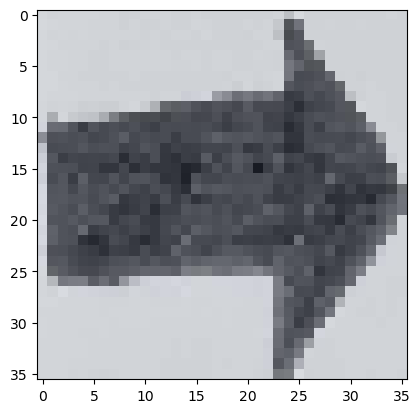

In [173]:
plt.imshow(arrow36)

In [176]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [174]:
(h, w) = img_list[9].shape[:2]
(cX, cY) = (w // 2, h // 2)

In [175]:
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated_90 = cv2.warpAffine(img_list[9], M, (w, h))

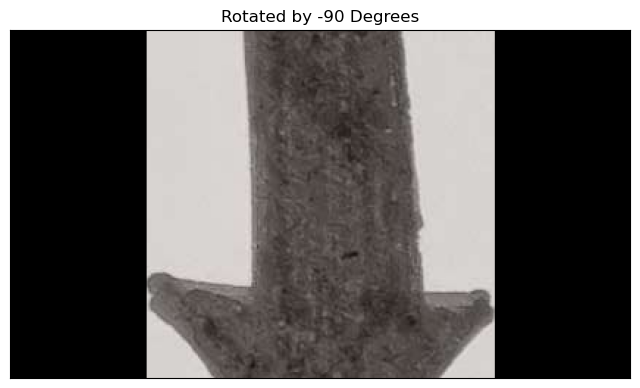

In [177]:
img_show(["Rotated by -90 Degrees"], [rotated_90])